In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('/home/adish/Desktop/Mall_Customers.csv')
x = df.iloc[:, [3, 4]].values
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
from sklearn.cluster import KMeans

In [9]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    km.inertia_#inertia_ gives sse value for each k
    sse.append(km.inertia_)


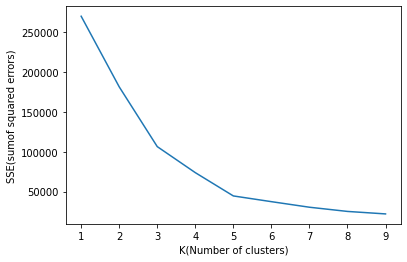

In [10]:
#plotting sse vs k(number of clusters)
plt.xlabel('K(Number of clusters)')
plt.ylabel('SSE(sumof squared errors)')
plt.plot(k_range,sse)


### optimal number of clusters = 5

In [12]:
#applying kmeans algorithm to scaled dataset
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [13]:
df['cluster_number']=y_pred
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


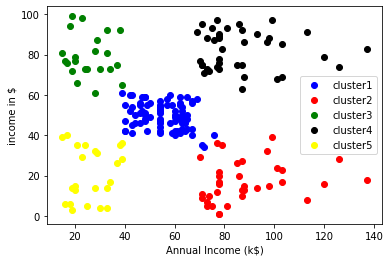

In [15]:
#plotting after doing feature scaling

dfc1=df[df.cluster_number==0]
dfc2=df[df.cluster_number==1]
dfc3=df[df.cluster_number==2]
dfc4=df[df.cluster_number==3]
dfc5=df[df.cluster_number==4]

plt.scatter(dfc1['Annual Income (k$)'],dfc1['Spending Score (1-100)'],color='blue',label='cluster1')
plt.scatter(dfc2['Annual Income (k$)'],dfc2['Spending Score (1-100)'],color='red',label='cluster2')
plt.scatter(dfc3['Annual Income (k$)'],dfc3['Spending Score (1-100)'],color='green',label='cluster3')
plt.scatter(dfc4['Annual Income (k$)'],dfc4['Spending Score (1-100)'],color='black',label='cluster4')
plt.scatter(dfc5['Annual Income (k$)'],dfc5['Spending Score (1-100)'],color='yellow',label='cluster5')


plt.xlabel('Annual Income (k$)')
plt.ylabel('income in $')
plt.legend()